# **Curso IA desde Cero**

* Dr. Irvin Hussein López Nava
* M.C. Joan M. Raygoza Romero

## ¿Qué es el procesamiento de texto?
El texto es información no estructurada.
Las computadoras no entienden palabras, solo números, así que hay que convertir el texto en representaciones numéricas útiles.

El flujo típico es:

Texto bruto → limpieza → tokens → representación numérica → modelo

Tokenizar es como cortar un párrafo en piezas manejables.

## ¿Por qué limpiar el texto?
Para que:

* “Hola”, “hola” y “HOLA” cuenten como lo mismo
* Quitarnos signos de puntuación que no aportan
* Evitar espacios y caracteres raros

## Pasar a minúsculas

In [15]:
texto = "Hola, Soy Un Estudiante del curso de IA desde cero."
texto_min = texto.lower()
print(texto_min)

hola, soy un estudiante del curso de ia desde cero.


## Remover signos de puntuación

Podemos usar el módulo string o expresiones regulares (re).

In [16]:
import re

texto = "Hola, soy estudiante del curso de IA desde cero; ¿y tú?"
texto_limpio = re.sub(r"[^a-zA-ZÁÉÍÓÚáéíóúñÑ0-9\s]", "", texto)
print(texto_limpio)

Hola soy estudiante del curso de IA desde cero y tú


## Quitar espacios extra

A veces, al limpiar texto, quedan espacios dobles o al inicio/final.

In [17]:
texto = "   Hola   soy   estudiante   "
texto_strip = texto.strip()           # quita espacios al inicio y final
texto_clean_spaces = " ".join(texto_strip.split())  # deja solo 1 espacio entre palabras

print(texto_clean_spaces)

Hola soy estudiante


## Quitar números

Si no te interesan los números en tu tarea.

In [18]:
import re

texto = "Tengo 2 perros y 3 gatos."
texto_sin_numeros = re.sub(r"\d+", "", texto)
print(texto_sin_numeros)

Tengo  perros y  gatos.


## Normalizar acentos

A veces conviene quitar acentos para evitar versiones distintas de la misma palabra.

In [19]:
!pip install unidecode
from unidecode import unidecode

texto = "Información útil para la lematización y análisis."
texto_sin_acentos = unidecode(texto)
print(texto_sin_acentos)

Informacion util para la lematizacion y analisis.


## Tokenización
Dividir un texto en palabras (tokens).

In [20]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

texto = "Hola estudiantes sean bienvenidos a la clase de IA desde cero."
tokens = word_tokenize(texto)
print(tokens)

['Hola', 'estudiantes', 'sean', 'bienvenidos', 'a', 'la', 'clase', 'de', 'IA', 'desde', 'cero', '.']


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## Stopwords

Son palabras muy comunes que no aportan significado importante:
“el”, “la”, “de”, “y”, “a”, “para”, etc.

Quitarlas ayuda a que los modelos se centren en las palabras importantes.

In [21]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop = set(stopwords.words("spanish"))
tokens_filtrados = [t for t in tokens if t.lower() not in stop]
print(tokens_filtrados)

['Hola', 'estudiantes', 'bienvenidos', 'clase', 'IA', 'cero', '.']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Stemming

Reduce una palabra a su raíz aproximada (no siempre es una palabra real).

Es como cortar un árbol hasta el “tronco”, aunque no siempre queda bonito.

In [22]:
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('spanish')
print(stemmer.stem("corriendo"))
print(stemmer.stem("computadoras"))

corr
comput


## Lematización

Devuelve la forma base correcta de una palabra (lema), respetando gramática.

Más precisa que el stemming, pero también más lenta.

In [23]:
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 20.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [24]:
import spacy
nlp = spacy.load("es_core_news_sm")

doc = nlp("Los estudiantes estaban estudiando programación.")
lemmas = [token.lemma_ for token in doc]
print(lemmas)

['el', 'estudiante', 'estar', 'estudiar', 'programación', '.']


## Bolsa de Palabras (Bag of Words - BoW)
Representa cada texto por cuántas veces aparece cada palabra.

No importa el orden, solo la frecuencia.

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    "El gato duerme",
    "El perro ladra",
    "El gato y el perro juegan"
]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print(X.toarray())

['duerme' 'el' 'gato' 'juegan' 'ladra' 'perro']
[[1 1 1 0 0 0]
 [0 1 0 0 1 1]
 [0 2 1 1 0 1]]


## TF-IDF

Mide importancia de una palabra:

* TF = frecuencia en el documento

* IDF = rareza en el corpus

* TF-IDF = TF * IDF

TF-IDF > BoW cuando hay mucha repetición de palabras comunes.

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print(X.toarray())

['duerme' 'el' 'gato' 'juegan' 'ladra' 'perro']
[[0.72033345 0.42544054 0.54783215 0.         0.         0.        ]
 [0.         0.42544054 0.         0.         0.72033345 0.54783215]
 [0.         0.62674687 0.40352536 0.53058735 0.         0.40352536]]


## N-gramas

Secuencias de n palabras consecutivas.

Ejemplos:

* Uni-gramas: “el”, “gato”

* Bi-gramas: “el gato”

* Tri-gramas: “el gato duerme”

Capturan contexto y frases comunes.

In [27]:
vectorizer = CountVectorizer(ngram_range=(1,2))
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())

['duerme' 'el' 'el gato' 'el perro' 'gato' 'gato duerme' 'gato el'
 'juegan' 'ladra' 'perro' 'perro juegan' 'perro ladra']


## Ejemplo de procesamiento de texto

In [32]:
# Si es la primera vez:
!pip install unidecode scikit-learn
import nltk
nltk.download("punkt")
from nltk.corpus import stopwords
nltk.download('stopwords')

import re
import string
from unidecode import unidecode
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

stemmer = SnowballStemmer("spanish")

def limpiar_y_stem(texto):
    # Minúsculas
    t = texto.lower()
    # Quitar acentos
    t = unidecode(t)
    # Quitar puntuación
    t = "".join(ch for ch in t if ch not in string.punctuation)
    # Quitar números
    t = re.sub(r"\d+", "", t)
    # Espacios extra
    t = " ".join(t.split())
    # Tokenizar
    tokens = word_tokenize(t, language="spanish")
    # Quitar stopwords
    stop = set(stopwords.words("spanish"))
    tokens = [t for t in tokens if t not in stop]
    # Stemming
    stems = [stemmer.stem(tok) for tok in tokens]
    # Regresar como string (para scikit-learn)
    return " ".join(stems)

corpus_raw = [
    "Me gusta mucho aprender procesamiento de lenguaje natural.",
    "El procesamiento de texto es muy útil para la inteligencia artificial.",
    "Aprender NLP con ejemplos prácticos es más divertido."
]

print("Corpus original:")
for c in corpus_raw:
    print(" -", c)

# Aplicar limpieza + stemming a cada documento
corpus_proc = [limpiar_y_stem(doc) for doc in corpus_raw]

print("\nCorpus preprocesado:")
for c in corpus_proc:
    print(" -", c)

# ---------- Bolsa de palabras (BoW) ----------
bow_vectorizer = CountVectorizer(ngram_range=(1,1))
X_bow = bow_vectorizer.fit_transform(corpus_proc)

print("\nVocabulario BoW:")
print(bow_vectorizer.get_feature_names_out())

print("\nMatriz BoW (filas=documentos, columnas=palabras):")
print(X_bow.toarray())

# ---------- TF-IDF ----------
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,1))
X_tfidf = tfidf_vectorizer.fit_transform(corpus_proc)

print("\nVocabulario TF-IDF:")
print(tfidf_vectorizer.get_feature_names_out())

print("\nMatriz TF-IDF:")
print(X_tfidf.toarray())

Corpus original:
 - Me gusta mucho aprender procesamiento de lenguaje natural.
 - El procesamiento de texto es muy útil para la inteligencia artificial.
 - Aprender NLP con ejemplos prácticos es más divertido.

Corpus preprocesado:
 - gust aprend proces lenguaj natural
 - proces text util inteligent artificial
 - aprend nlp ejempl practic mas divert

Vocabulario BoW:
['aprend' 'artificial' 'divert' 'ejempl' 'gust' 'inteligent' 'lenguaj'
 'mas' 'natural' 'nlp' 'practic' 'proces' 'text' 'util']

Matriz BoW (filas=documentos, columnas=palabras):
[[1 0 0 0 1 0 1 0 1 0 0 1 0 0]
 [0 1 0 0 0 1 0 0 0 0 0 1 1 1]
 [1 0 1 1 0 0 0 1 0 1 1 0 0 0]]

Vocabulario TF-IDF:
['aprend' 'artificial' 'divert' 'ejempl' 'gust' 'inteligent' 'lenguaj'
 'mas' 'natural' 'nlp' 'practic' 'proces' 'text' 'util']

Matriz TF-IDF:
[[0.37302199 0.         0.         0.         0.49047908 0.
  0.49047908 0.         0.49047908 0.         0.         0.37302199
  0.         0.        ]
 [0.         0.46735098 0.         0.  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Visualización de la bolsa de palabras

In [29]:
!pip install wordcloud

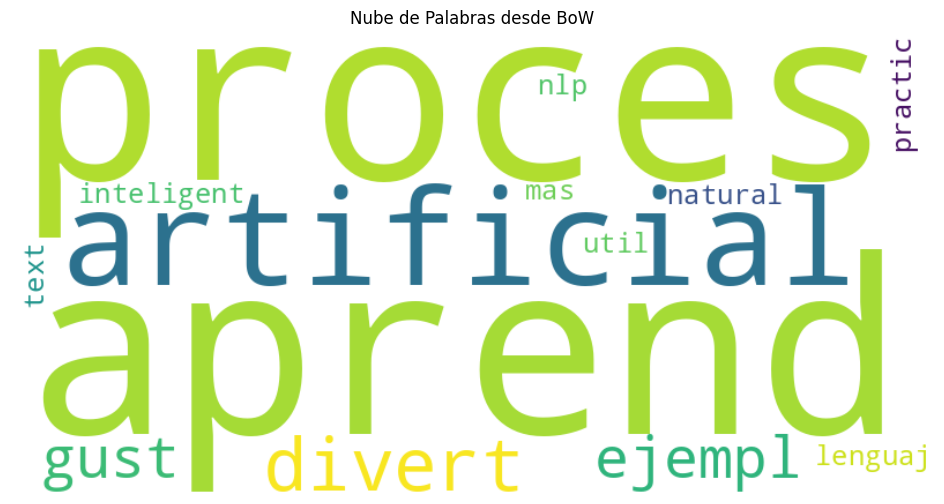

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Obtener vocabulario y conteos totales por palabra
vocab = bow_vectorizer.get_feature_names_out()
counts = X_bow.toarray().sum(axis=0)   # sumatoria de filas = frecuencia total

# Construir diccionario palabra → frecuencia
freq_dict = dict(zip(vocab, counts))

# Crear la nube de palabras
wc = WordCloud(width=800, height=400, background_color="white")
wc = wc.generate_from_frequencies(freq_dict)

# Visualizar
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras desde BoW")
plt.show()